In [1]:
import warnings
warnings.filterwarnings("ignore")
import numpy as np # to use numpy arrays instead of lists
import pandas as pd # DataFrame (table)
import matplotlib.pyplot as plt # to plot

In [2]:
import tensorflow as tf
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, Dense
from tensorflow.keras.layers import LSTM, Dropout
from tensorflow.keras.callbacks import EarlyStopping
!pip install keras-tuner # Install keras-tuner
import keras_tuner as kt # Now import keras_tuner

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 129.1/129.1 kB 3.2 MB/s eta 0:00:00


In [3]:
from sklearn.metrics import classification_report
from google.colab import drive
drive.mount('gdrive')

Mounted at gdrive


In [4]:
def leeDatos():

    corpus = "Ay, Edward will use women honorably! \n Would he were wasted—marrow, bones, and all— \n That from his loins no hopeful branch may spring \n To cross me from the golden time I look for. \n And yet, between my soul’s desire and me, \n The lustful Edward’s title burièd, \n Is Clarence, Henry, and his son, young Edward, \n And all the unlooked-for issue of their bodies \n To take their rooms ere I can place myself. \n A cold premeditation for my purpose. \n Why, then, I do but dream on sovereignty \n Like one that stands upon a promontory \n And spies a far-off shore where he would tread, \n Wishing his foot were equal with his eye, \n And chides the sea that sunders him from thence, \n Saying he’ll lade it dry to have his way. \n So do I wish the crown, being so far off, \n And so I chide the means that keeps me from it, \n And so, I say, I’ll cut the causes off, \n Flattering me with impossibilities. \n My eye’s too quick, my heart o’erweens too much, \n Unless my hand and strength could equal them. \n Well, say there is no kingdom then for Richard, \n What other pleasure can the world afford? \n I’ll make my heaven in a lady’s lap \n And deck my body in gay ornaments, \n And ’witch sweet ladies with my words and looks. \n O miserable thought, and more unlikely \n Than to accomplish twenty golden crowns! \n Why, Love forswore me in my mother’s womb, \n And, for I should not deal in her soft laws, \n She did corrupt frail Nature with some bribe \n To shrink mine arm up like a withered shrub; \n To make an envious mountain on my back, \n Where sits Deformity to mock my body; \n To shape my legs of an unequal size; \n To disproportion me in every part, \n Like to a chaos, or an unlicked bear-whelp, \n That carries no impression like the dam. \n And am I then a man to be beloved? \n O monstrous fault to harbor such a thought! \n Then, since this Earth affords no joy to me \n But to command, to check, to o’erbear such \n As are of better person than myself, I’ll make my heaven to dream upon the crown, \n And, whiles I live, t’ account this world but hell \n Until my misshaped trunk that bears this head \n Be round impalèd with a glorious crown. And yet I know not how to get the crown, \n For many lives stand between me and home; \n And I, like one lost in a thorny wood, \n That rents the thorns and is rent with the thorns, \n Seeking a way and straying from the way, \n Not knowing how to find the open air, \n But toiling desperately to find it out, \n Torment myself to catch the English crown. \n And from that torment I will free myself \n Or hew my way out with a bloody axe. \n Why, I can smile, and murder whiles I smile, \n And cry “Content” to that which grieves my heart, \n And wet my cheeks with artificial tears, \n And frame my face to all occasions. \n I’ll drown more sailors than the mermaid shall; \n I’ll slay more gazers than the basilisk; \n I’ll play the orator as well as Nestor, \n Deceive more slyly than Ulysses could, \n And, like a Sinon, take another Troy. \n I can add colors to the chameleon, \n Change shapes with Proteus for advantages, \n And set the murderous Machiavel to school. \n Can I do this and cannot get a crown? \n Tut, were it farther off, I’ll pluck it down."
    dataSet = corpus.lower().split("\n")

    return dataSet

In [5]:
"""
def processData(dataSet = 0):

    tokenizer = Tokenizer()
    tokenizer.fit_on_texts(dataSet)
    total_words = len(tokenizer.word_index) + 1

    input_sequences = []
    for line in dataSet:
      token_list = tokenizer.texts_to_sequences([line])[0]
      for i in range (1, len(token_list)):
        n_gram_sequence = token_list[:i+1]
        input_sequences.append(n_gram_sequence)

    max_sequence_len = max([len(x) for x in input_sequences])
    input_sequences = np.array(pad_sequences(input_sequences, maxlen=max_sequence_len, padding="pre"))

    xs = input_sequences[:,:-1]
    labels = input_sequences[:,-1]
    ys = tf.keras.utils.to_categorical(labels, num_classes=total_words)

    return xs, ys, total_words, max_sequence_len
"""

'\ndef processData(dataSet = 0):\n\n    tokenizer = Tokenizer()\n    tokenizer.fit_on_texts(dataSet)\n    total_words = len(tokenizer.word_index) + 1\n\n    input_sequences = []\n    for line in dataSet:\n      token_list = tokenizer.texts_to_sequences([line])[0]\n      for i in range (1, len(token_list)):\n        n_gram_sequence = token_list[:i+1]\n        input_sequences.append(n_gram_sequence)\n\n    max_sequence_len = max([len(x) for x in input_sequences])\n    input_sequences = np.array(pad_sequences(input_sequences, maxlen=max_sequence_len, padding="pre"))\n\n    xs = input_sequences[:,:-1]\n    labels = input_sequences[:,-1]\n    ys = tf.keras.utils.to_categorical(labels, num_classes=total_words)\n\n    return xs, ys, total_words, max_sequence_len\n'

In [6]:
poem = leeDatos()

tokenizer = Tokenizer()
tokenizer.fit_on_texts(poem)
total_words = len(tokenizer.word_index) + 1

print(tokenizer.word_index)
print(total_words)

input_sequences = []
for line in poem:
  token_list = tokenizer.texts_to_sequences([line])[0]
  for i in range (1, len(token_list)):
    n_gram_sequence = token_list[:i+1]
    input_sequences.append(n_gram_sequence)

max_sequence_len = max([len(x) for x in input_sequences])
input_sequences = np.array(pad_sequences(input_sequences, maxlen=max_sequence_len, padding="pre"))

xs = input_sequences[:,:-1]
labels = input_sequences[:,-1]
ys = tf.keras.utils.to_categorical(labels, num_classes=total_words)

{'and': 1, 'to': 2, 'the': 3, 'my': 4, 'i': 5, 'a': 6, 'that': 7, 'with': 8, 'me': 9, 'for': 10, 'i’ll': 11, 'from': 12, 'like': 13, 'crown': 14, 'in': 15, 'his': 16, 'can': 17, 'it': 18, 'than': 19, 'no': 20, 'myself': 21, 'then': 22, 'but': 23, 'off': 24, 'way': 25, 'so': 26, 'more': 27, 'this': 28, 'were': 29, 'is': 30, 'of': 31, 'why': 32, 'do': 33, 'make': 34, 'not': 35, 'an': 36, 'as': 37, 'edward': 38, 'will': 39, 'would': 40, 'he': 41, 'golden': 42, 'yet': 43, 'between': 44, 'all': 45, 'their': 46, 'take': 47, 'dream': 48, 'on': 49, 'one': 50, 'upon': 51, 'far': 52, 'where': 53, 'equal': 54, 'say': 55, 'too': 56, 'heart': 57, 'could': 58, 'well': 59, 'world': 60, 'heaven': 61, 'body': 62, 'o': 63, 'thought': 64, 'or': 65, 'be': 66, 'such': 67, 'whiles': 68, 'how': 69, 'get': 70, 'thorns': 71, 'find': 72, 'out': 73, 'torment': 74, 'smile': 75, 'ay': 76, 'use': 77, 'women': 78, 'honorably': 79, 'wasted—marrow': 80, 'bones': 81, 'all—': 82, 'loins': 83, 'hopeful': 84, 'branch': 85

In [7]:
#poem = leeDatos()
#xs, Ys, total_words, max_sequence_len = processData(poem)
print(xs)
print(len(xs))
print(ys)

[[  0   0   0 ...   0   0  76]
 [  0   0   0 ...   0  76  38]
 [  0   0   0 ...  76  38  39]
 ...
 [  0   0   0 ... 302  24  11]
 [  0   0   0 ...  24  11 303]
 [  0   0   0 ...  11 303  18]]
506
[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 1. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 1.]]


In [8]:
dropout_rate = 0.2
embedding_dim = 600
LSTM_Model = Sequential([
                    Embedding(total_words, embedding_dim, input_length=max_sequence_len-1),
                    LSTM(256, return_sequences = True, name="Hidden_layer_1"),
                    Dropout(dropout_rate),
                    LSTM(128, name="Hidden_layer_2"),
                    Dropout(dropout_rate),
                    Dense(total_words,  activation='softmax', name="Outpul_layer")
                    ])

In [9]:
opt = 'adam'
loss_fun = 'categorical_crossentropy'
acc = ['accuracy']

In [10]:
LSTM_Model.compile(
    optimizer = opt,
    loss = loss_fun,
    metrics = acc
    )

In [11]:
LSTM_Model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ embedding (Embedding)                │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ Hidden_layer_1 (LSTM)                │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ Hidden_layer_2 (LSTM)                │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ Outpul_layer (Dense)                 │ ?                           │     0 (unbuilt) │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

In [12]:
num_epochs = 100

LSTM_history = LSTM_Model.fit(xs,
                    ys,
                    validation_split=0.05,
                    epochs=num_epochs,
                    verbose=2)

Epoch 1/100
15/15 - 15s - 1s/step - accuracy: 0.0208 - loss: 5.6818 - val_accuracy: 0.0000e+00 - val_loss: 5.6803
Epoch 2/100
15/15 - 4s - 276ms/step - accuracy: 0.0292 - loss: 5.4590 - val_accuracy: 0.0385 - val_loss: 5.8168
Epoch 3/100
15/15 - 4s - 267ms/step - accuracy: 0.0292 - loss: 5.3620 - val_accuracy: 0.0385 - val_loss: 5.9294
Epoch 4/100
15/15 - 5s - 315ms/step - accuracy: 0.0312 - loss: 5.3046 - val_accuracy: 0.0385 - val_loss: 6.0033
Epoch 5/100
15/15 - 6s - 399ms/step - accuracy: 0.0396 - loss: 5.2862 - val_accuracy: 0.0385 - val_loss: 6.0707
Epoch 6/100
15/15 - 6s - 393ms/step - accuracy: 0.0437 - loss: 5.2818 - val_accuracy: 0.0385 - val_loss: 6.1267
Epoch 7/100
15/15 - 5s - 305ms/step - accuracy: 0.0333 - loss: 5.2807 - val_accuracy: 0.0385 - val_loss: 6.1636
Epoch 8/100
15/15 - 4s - 234ms/step - accuracy: 0.0271 - loss: 5.2577 - val_accuracy: 0.0385 - val_loss: 6.2250
Epoch 9/100
15/15 - 4s - 278ms/step - accuracy: 0.0396 - loss: 5.2389 - val_accuracy: 0.0000e+00 - val

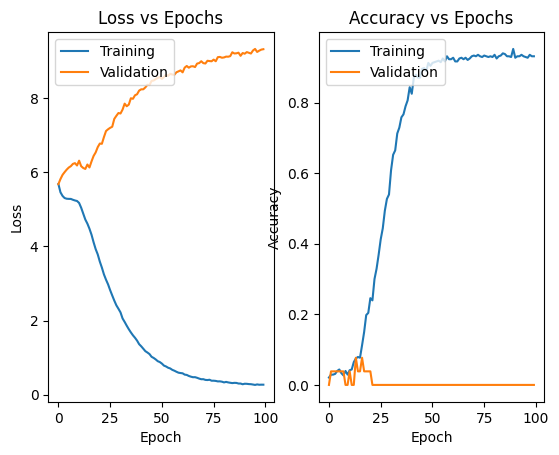

In [13]:
fig = plt.figure()
fig.add_subplot(121)
plt.plot(LSTM_history.history['loss'])
plt.plot(LSTM_history.history['val_loss'])
plt.title("Loss vs Epochs")
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Training', 'Validation'], loc='upper left')
fig.add_subplot(122)
plt.plot(LSTM_history.history['accuracy'])
plt.plot(LSTM_history.history['val_accuracy'])
plt.title("Accuracy vs Epochs")
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Training', 'Validation'], loc='upper left')
plt.show()

In [15]:
seed_text = "Whether 'tis nobler in the mind to suffer \n The slings and arrows of outrageous fortune"
next_words = 40

for i in range(next_words):
  token_list = tokenizer.texts_to_sequences([seed_text])[0]
  token_list = pad_sequences([token_list], maxlen=max_sequence_len-1, padding="pre")
  predicted = LSTM_Model.predict(token_list, verbose=0)
  output_word = ""
  predicted = np.argmax(predicted, axis=-1)
  for word, index, in tokenizer.word_index.items():
    print(word)
    print(index)
    print(predicted)
    if index in predicted:
      output_word = word
      break
  seed_text += " " + output_word

print(seed_text)

Streaming output truncated to the last 5000 lines.
such
67
[145]
whiles
68
[145]
how
69
[145]
get
70
[145]
thorns
71
[145]
find
72
[145]
out
73
[145]
torment
74
[145]
smile
75
[145]
ay
76
[145]
use
77
[145]
women
78
[145]
honorably
79
[145]
wasted—marrow
80
[145]
bones
81
[145]
all—
82
[145]
loins
83
[145]
hopeful
84
[145]
branch
85
[145]
may
86
[145]
spring
87
[145]
cross
88
[145]
time
89
[145]
look
90
[145]
soul’s
91
[145]
desire
92
[145]
lustful
93
[145]
edward’s
94
[145]
title
95
[145]
burièd
96
[145]
clarence
97
[145]
henry
98
[145]
son
99
[145]
young
100
[145]
unlooked
101
[145]
issue
102
[145]
bodies
103
[145]
rooms
104
[145]
ere
105
[145]
place
106
[145]
cold
107
[145]
premeditation
108
[145]
purpose
109
[145]
sovereignty
110
[145]
stands
111
[145]
promontory
112
[145]
spies
113
[145]
shore
114
[145]
tread
115
[145]
wishing
116
[145]
foot
117
[145]
eye
118
[145]
chides
119
[145]
sea
120
[145]
sunders
121
[145]
him
122
[145]
thence
123
[145]
saying
124
[145]
he’ll
125
[145]
lade